# Testing notebook

In [6]:
import os 

path = os.getcwd()
# find the string 'project' in the path, return index
index_project = path.find('project')
# slice the path from the index of 'project' to the end
project_path = path[:index_project+7]
# set the working directory
os.chdir(project_path)
print(f'Project path set to: {os.getcwd()}')


Project path set to: c:\Github\ode-biomarker-project


# Toolkit Tests

## Feature Transformer

In [2]:
import pandas as pd

# loading cell line proteomic expression data

cancercell2022 = pd.read_csv('data\preprocessed\SY-Processed\CancerCell2022_PRISM.csv')

cancercell2022_dropnan = cancercell2022.dropna(subset=['AUC'])

import DataFunctions as dfunc 

feature_data, label_data = dfunc.create_feature_and_label(cancercell2022_dropnan, label_name='AUC')

feature_data_no_row = feature_data.drop(['Row'], axis=1)

In [7]:
from toolkit import FeatureTransformer
from toolkit import impute_by_zero, impute_by_first_quantile, get_network_stat_features, get_random_features

F = FeatureTransformer()

F.add_transform_function('impute_by_zero', impute_by_zero)
F.add_selection_function('random_select', get_random_features, {"selection_size": 10})

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, random_state=42)

# Print the shapes of the new X objects

print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}, X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

# Run Feature Transformer 

selected_features, sel_train, sel_test = F.run(X_train, y_train, X_test)

print(selected_features, sel_train.shape, sel_test.shape)  

NameError: name 'feature_data' is not defined

In [ ]:
# clear variables in juptyer notebook

%reset -f

## Feature Selection Methods

In [2]:
from sklearn.datasets import make_regression
import pandas as pd

# turn X and Y into dataframes
X, y = make_regression(n_samples=500, n_features=1000, n_informative=10, random_state=1, shuffle=False)

X = pd.DataFrame(X)
y = pd.Series(y)

# turn columns into strings

X.columns = [str(i) for i in range(X.shape[1])]

print(f'Original informative columns: {X.columns[:10]}')

# shuffle columns around for X

X = X.sample(frac=1, axis=1, random_state=0)

print(f'Newly shuffled columns: {X.columns[:10]}')


Original informative columns: Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')
Newly shuffled columns: Index(['993', '859', '298', '553', '672', '971', '27', '231', '306', '706'], dtype='object')


In [3]:
from toolkit import mrmr_select_fcq

features, scores = mrmr_select_fcq(X, y, K=10,verbose=True)

c:\Github\ode-biomarker-project\dynamic-marker\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Iteration 1 selected 6 score 20349023.18055924 remaining 999 features
Iteration 2 selected 913 score 9236.404740325002 remaining 998 features
Iteration 3 selected 762 score 3338.49141856536 remaining 997 features
Iteration 4 selected 5 score 2401.434983185637 remaining 996 features
Iteration 5 selected 7 score 1958.8192067425084 remaining 995 features
Iteration 6 selected 1 score 1322.7038843133394 remaining 994 features
Iteration 7 selected 8 score 952.2757379286545 remaining 993 features
Iteration 8 selected 4 score 903.1707225760754 remaining 992 features
Iteration 9 selected 3 score 481.3610921002683 remaining 991 features
Iteration 10 selected 215 score 204.25794018077414 remaining 990 features


In [4]:
from toolkit import enet_select

features, scores = enet_select(X, y, 10, max_iter=10000, alpha=0.1, l1_ratio=0.7)

print(features)
print(scores)

[465 193 580  29 629 137 524 551 247   7]
[53.5348648  46.46452212 37.03393571 35.39034433 23.38224216 22.14676406
 15.05663697 12.11902955 11.56421631  9.09762054]


In [5]:
from toolkit import rf_select

features, scores = rf_select(X, y, k=10, n_estimators=100, max_depth=5, n_jobs=-1)

print(features)
print(scores)

[465 193 580  29 137 629 524 342  35 790]
[0.29646599 0.2238035  0.1167996  0.06645544 0.01195476 0.00679736
 0.00391873 0.00287384 0.00282981 0.00201532]


In [6]:
from toolkit import f_regression_select

features, scores = f_regression_select(X, y, k=10)
print(features)
print(scores)

Index(['1', '456', '8', '5', '6', '781', '3', '7', '4', '621'], dtype='object')
[ 62.83937464  11.86299028  28.68197294 157.83757371 203.49023181
   9.34440972  16.75903932 100.30555487  40.46596522   8.47049546]


In [8]:
from toolkit import relieff_select

features, scores = relieff_select(X, y, k=10, n_jobs=4)
print(features)
print(scores)


[675  99 765 635   2 307 301 770 328  75]
[0.00149231 0.00147896 0.00141029 0.00137384 0.00129534 0.00123079
 0.00122917 0.00122489 0.00121487 0.00120116]


In [ ]:
# clear variables in juptyer notebook

%reset -f

## Selection Functions

## Transforming Functions


# TorchApp Tests

# Loading SBML Models

In [7]:
# loading anthony's sbml model

from libsbml import *

reader = SBMLReader()

document = reader.readSBML("data\export_ECC_Base.xml")



In [13]:
model = document.getModel()

print(f'Document errors: {document.getNumErrors()}')

Document errors: 0


In [9]:
print(f'Number of species: {model.getNumSpecies()}')

print(f'Number of reactions: {model.getNumReactions()}')

print(f'Number of compartments: {model.getNumCompartments()}')

print(f'Number of parameters: {model.getNumParameters()}')

Number of species: 59
Number of reactions: 83
Number of compartments: 1
Number of parameters: 129


In [10]:
print(f'Number of rules: {model.getNumRules()}')

Number of rules: 18


<Model "ECC_Base">


In [15]:
import roadrunner

rr = roadrunner.RoadRunner("data\export_ECC_Base.xml")

print(f'Number of floating species: {len(rr.model.getFloatingSpeciesIds())}')

print(f'Number of boundary species: {len(rr.model.getBoundarySpeciesIds())}')

print(f'Number of global parameters: {len(rr.model.getGlobalParameterIds())}')

print(f'Number of compartments: {len(rr.model.getCompartmentIds())}')

Number of floating species: 59
Number of boundary species: 0
Number of global parameters: 129
Number of compartments: 1


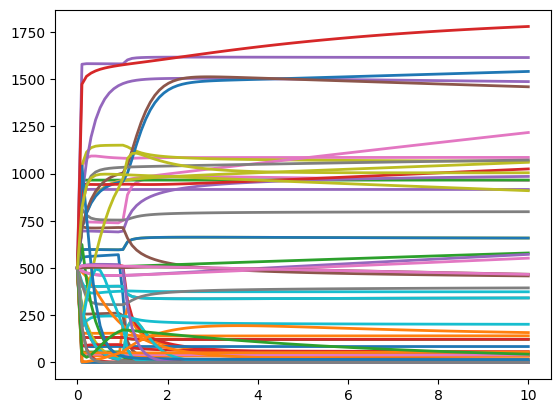

[[<matplotlib.lines.Line2D at 0x1dc8118dbe0>],

In [16]:
result = rr.simulate(0, 10, 100)

rr.plot(result)

In [17]:
rr.reset()

In [19]:
print(f'{rr.model.getFloatingSpeciesIds()}')


['INSR', 'INSRpY', 'IRS', 'IRSi', 'S6KpT389', 'PI3K', 'INSRccIRSccPI3K', 'PDK1', 'PDK1b', 'MTORC2', 'MTORC2b', 'AKT', 'AKTpT308', 'AKTpS473', 'AKTpp', 'MTORC1', 'MTORC1a', 'ERKpp', 'CDK46ccCYCD', 'MTORC1i', 'S6K', 'GSK3B', 'GSK3Bi', 'SOS', 'INSRccIRSccSOS', 'SOSi', 'RAF', 'RAFa', 'RAFi', 'ERK', 'MYC', 'E2F', 'MYCpS62', 'CDK2ccCYCE', 'MYCpp', 'CYCD', 'CYCDpT286', 'CYCE', 'CYCEpT380', 'P21', 'P21pT57', 'P27', 'P27pT187', 'P27i', 'CDK46', 'CDK46ccCYCDp', 'CDK2', 'CDK2ccCYCEp', 'RB', 'RBp', 'RBpp', 'E2FccRB', 'E2FccRBp', 'E2FccRBpp', 'CDK46ccCYCDccP21', 'CDK46ccCYCDccP27', 'CDK2ccCYCEccP21', 'CDK2ccCYCEccP27', 'CDK2ccCYCEccP27p']


In [20]:
rr.model["init(IRS)"]

# rr.model["init(IRS)"] = 0.5 # for changing initial conditions

500.0

In [21]:
rr.model.getGlobalParameterIds()



['kc_INSULIN_INSR_INSRpY',
 'Vm_INSRpY_INSR',
 'kc_S6KpT389_IRS_IRSi',
 'Vm_IRSi_IRS',
 'ka_INSRpY_IRS_PI3K_INSRccIRSccPI3K',
 'kd_INSRccIRSccPI3K_INSR_IRS_PI3K',
 'kc_INSRccIRSccPI3K_PDK1_PDK1b',
 'kc_PTEN_PDK1b_PDK1',
 'kc_INSRccIRSccPI3K_MTORC2_MTORC2b',
 'kc_PTEN_MTORC2b_MTORC2',
 'kc_PDK1b_AKT_AKTpT308',
 'Vm_AKTpT308_AKT',
 'kc_MTORC2b_AKT_AKTpS473',
 'Vm_AKTpS473_AKT',
 'kc_MTORC2b_AKTpT308_AKTpp',
 'kc_PDK1b_AKTpS473_AKTpp',
 'Vm_AKTpp_AKT',
 'kc_AKTact_MTORC1_MTORC1a',
 'kc_ERKpp_MTORC1_MTORC1a',
 'kc_CDK46ccCYCD_MTORC1_MTORC1a',
 'Vm_MTORC1a_MTORC1',
 'kc_S6KpT389_MTORC1_MTORC1i',
 'Vm_MTORC1i_MTORC1',
 'kc_MTORC1a_S6K_S6KpT389',
 'Vm_S6KpT389_S6K',
 'kc_AKTact_GSK3B_GSK3Bi',
 'kc_S6KpT389_GSK3B_GSK3Bi',
 'Vm_GSK3Bi_GSK3B',
 'ka_INSRpY_IRS_SOS_INSRccIRSccSOS',
 'kd_INSRccIRSccSOS_INSR_IRS_SOS',
 'kc_ERKpp_SOS_SOSi',
 'Vm_SOSi_SOS',
 'kc_INSRccIRSccSOS_RAF_RAFa',
 'Vm_RAFa_RAF',
 'kc_ERKpp_RAF_RAFi',
 'kc_AKTact_RAF_RAFi',
 'Vm_RAFi_RAF',
 'kc_RAFa_ERK_ERKpp',
 'Vm_ERKpp_ERK',

In [22]:
rr.kc_INSULIN_INSR_INSRpY

# rr.kc_INSULIN_INSR_INSRpY = 0.1 # for changing parameter values

0.1

In [23]:
rr.model['kc_INSULIN_INSR_INSRpY'] # another method for changing parameter values

0.1

In [24]:
rr.model['INSR'] # another method for changing initial condition values

500.0

## Linking CCLE data to Anthony's SBML model initial conditions

## Changing parameters in SBML model to the calibrated set

## Processing dynamic simulation data back to singular vector

## LanODEApp Tests

In [ ]:
'''load in core data and libraries'''

# libraries used 

# load CCLE expression data  

# load Anthony's model and optimal parameter sets 

document = reader.readSBML("data\export_ECC_Base.xml")
